In [51]:
import os
os.chdir("/content/drive/MyDrive/ineuron.ai internship/Machine Learning Project/sms spam classifer ML NLP")

## imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Load Dataset

In [53]:
df = pd.read_csv("/content/drive/MyDrive/ineuron.ai internship/Machine Learning Project/sms spam classifer ML NLP/spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Process
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. evaluation
6. imporvement
7. website
8. Deploy

### 1. Data Cleaning


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [55]:
# we can drop last three column because we are not going to use it
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [56]:
df.shape

(5572, 2)

In [57]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.rename(columns = {'v1':'Target','v2':'Text'},inplace = True)
df.head(1)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
df["Target"] = encoder.fit_transform(df['Target'])

In [61]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
# checking for null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [63]:
# checking for null values
df.duplicated().sum()

403

In [64]:
# remove dupicates
df = df.drop_duplicates(keep = 'first')

In [65]:
df.duplicated().sum()

0

In [66]:
df.shape

(5169, 2)

### EDA

In [67]:
## number of ham and spam ?
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

Number of ham are more in target columns around 8 times more

([<matplotlib.patches.Wedge at 0x7ffbb32b9ee0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

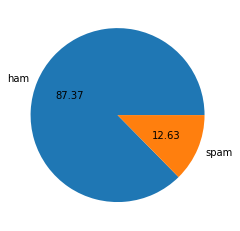

In [68]:
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")

In [69]:
# Data is imbalanced


In [70]:
import nltk

In [71]:
# number of character
df['num_character'] = df['Text'].apply(len)

In [72]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
# number of words
# word_tokenize is a function in Python that splits a given sentence into words using the NLTK library.

In [74]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [82]:
df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
## sentence wise tokenizes
## it will count how many number of different sentences are used by braking at '.' 
df["num_sentences"] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [78]:
df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [83]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [85]:
# description of ham
df[df['Target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [86]:
# description of spam
df[df['Target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Avg len of words, character, sentences in spam is higher than Ham

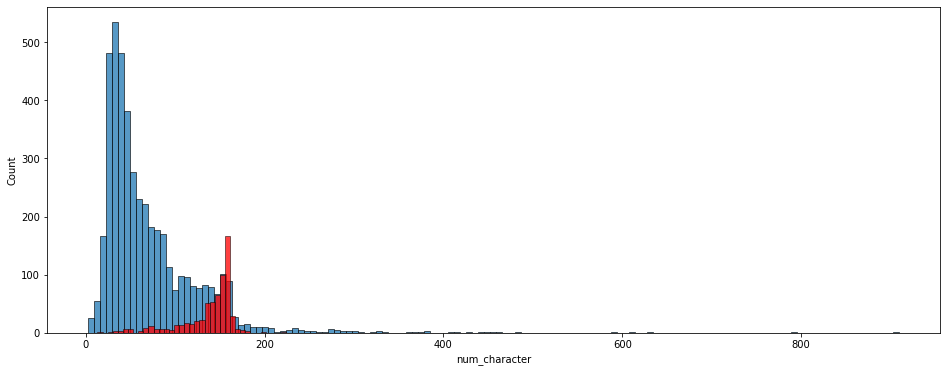

In [91]:
plt.figure(figsize =(16,6))
sns.histplot(df[df['Target'] == 0]['num_character'])
sns.histplot(df[df['Target'] == 1]['num_character'],color = 'red')

Most of the Ham messgae is formed by the less number of character 

Most of the Spam message is formed by the large number of character

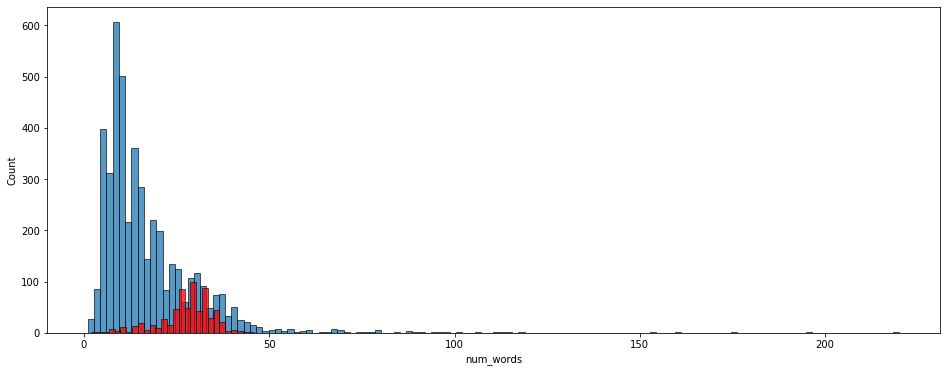

In [95]:
plt.figure(figsize =(16,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color = 'red')

We have many outlier in the data

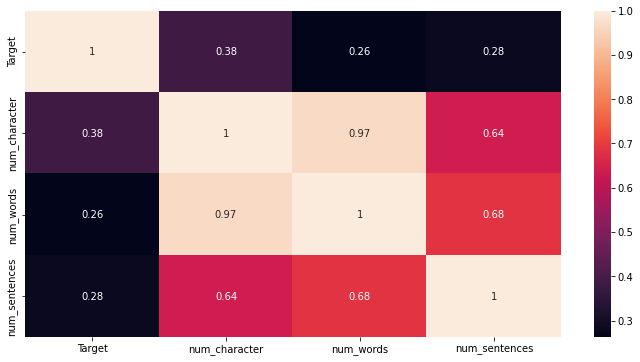

In [98]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)

multi colinearity is very high among 'num_character','num_words','num_sentences' so we have choice only num_character which has 0.38 correlation with target column 

## 3. Data Preprocessing  
1. Lower case
2. Tokenization 
3. Removing special chracters
4. Removing stop words and punctuation 
5. stemming

In [101]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [102]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [103]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [106]:
from nltk.tokenize.sonority_sequencing import punctuation
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [108]:
transform_text('I loved the YT Lectures for Machine Learning and data science')

'love yt lectur machin learn data scienc'

In [111]:
print(df['Text'][0])
print(transform_text(df['Text'][0]))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [113]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [114]:
df.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we will find most repating words in ham and spam messages using wordcloud function

In [117]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height= 500,min_font_size = 10,background_color='black')

In [120]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

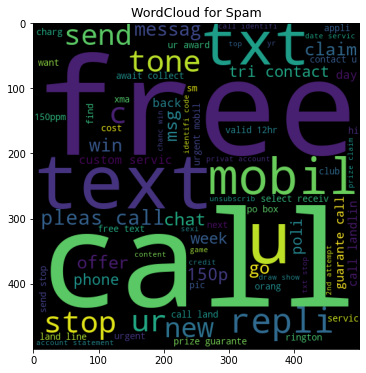

In [127]:

plt.figure(figsize = (12,6))
plt.title("WordCloud for Spam",size = (12.6))
plt.imshow(spam_wc)

In [129]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))

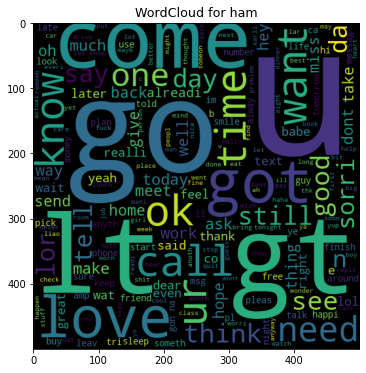

In [131]:
plt.figure(figsize = (12,6))
plt.title("WordCloud for ham",size = (12.6))
plt.imshow(ham_wc)

In [134]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].to_list():
  for words in msg.split():
    spam_corpus.append(words)



In [135]:
len(spam_corpus)

9939

In [139]:
# to find how many times a corpus word is repeated , most 30words...
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

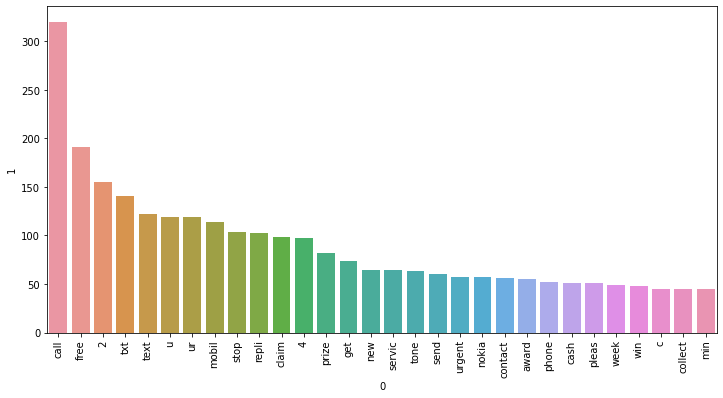

In [146]:
plt.figure(figsize = (12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')

above barplot shows top 30 words used in spam message

## 4 Model Building 

converting text into number

In [167]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [149]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [150]:
X.shape

(5169, 6708)

In [151]:
y = df['Target'].values

In [152]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [160]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## GaussianNB

In [162]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred1))
print("confusion_matrix",confusion_matrix(y_test,y_pred1))
print("precision_score",precision_score(y_test,y_pred1))


accuracy_score 0.8800773694390716
confusion_matrix [[792 104]
 [ 20 118]]
precision_score 0.5315315315315315


## MultinomialNB

In [166]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred2))
print("confusion_matrix",confusion_matrix(y_test,y_pred2))
print("precision_score",precision_score(y_test,y_pred2))


accuracy_score 0.9642166344294004
confusion_matrix [[871  25]
 [ 12 126]]
precision_score 0.8344370860927153


## BernoulliNB

In [165]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred3))
print("confusion_matrix",confusion_matrix(y_test,y_pred3))
print("precision_score",precision_score(y_test,y_pred3))


accuracy_score 0.9700193423597679
confusion_matrix [[893   3]
 [ 28 110]]
precision_score 0.9734513274336283


# Try with tfidf

In [171]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

## GaussianNB

In [172]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred1))
print("confusion_matrix",confusion_matrix(y_test,y_pred1))
print("precision_score",precision_score(y_test,y_pred1))

accuracy_score 0.8762088974854932
confusion_matrix [[793 103]
 [ 25 113]]
precision_score 0.5231481481481481


## MultinomialNB

In [173]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred2))
print("confusion_matrix",confusion_matrix(y_test,y_pred2))
print("precision_score",precision_score(y_test,y_pred2))

accuracy_score 0.9593810444874274
confusion_matrix [[896   0]
 [ 42  96]]
precision_score 1.0


## We will select tfidf multinomialnb because our main focus is on precision

## BernoulliNB

In [174]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred3))
print("confusion_matrix",confusion_matrix(y_test,y_pred3))
print("precision_score",precision_score(y_test,y_pred3))

accuracy_score 0.9700193423597679
confusion_matrix [[893   3]
 [ 28 110]]
precision_score 0.9734513274336283


## Save output model file in pickle format
1. tfidf (vectorizer form of text)
2. mnb (algo)

In [175]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))